In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# ÿ™ÿ≠ŸÖŸäŸÑ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ≤ŸáŸàÿ±
dataset_name = "tf_flowers"
dataset, info = tfds.load(dataset_name, as_supervised=True, with_info=True)

# ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ•ŸÑŸâ ÿ™ÿØÿ±Ÿäÿ® ŸàÿßÿÆÿ™ÿ®ÿßÿ±
split_ratio = 0.8
num_train = int(split_ratio * info.splits['train'].num_examples)

train_dataset = dataset['train'].take(num_train)  # 80% ÿ™ÿØÿ±Ÿäÿ®
test_dataset = dataset['train'].skip(num_train)   # 20% ÿßÿÆÿ™ÿ®ÿßÿ±

# ÿ™ÿ≠ÿØŸäÿØ ÿ≠ÿ¨ŸÖ ÿßŸÑÿµŸàÿ± ŸàÿßŸÑÿØŸÅÿπÿ©
img_height = 224
img_width = 224
batch_size = 32

# ÿ™ÿ¨ŸáŸäÿ≤ ÿßŸÑÿµŸàÿ± (ÿ™ÿ∫ŸäŸäÿ± ÿßŸÑÿ≠ÿ¨ŸÖÿå ÿßŸÑÿ™ÿ∑ÿ®Ÿäÿπ)
def format_image(image, label):
    image = tf.image.resize(image, (img_height, img_width)) / 255.0  # ÿ™ÿµÿ∫Ÿäÿ± ÿßŸÑÿµŸàÿ±ÿ© Ÿàÿ™ÿ∑ÿ®Ÿäÿπ ÿßŸÑŸÇŸäŸÖ
    return image, label

# ÿ™ÿ∑ÿ®ŸäŸÇ ÿßŸÑÿ™ÿ¨ŸáŸäÿ≤ ÿπŸÑŸâ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
train_dataset = train_dataset.map(format_image).batch(batch_size).shuffle(1000)
test_dataset = test_dataset.map(format_image).batch(batch_size)

# **ÿ™ÿ≠ŸÖŸäŸÑ ŸÜŸÖŸàÿ∞ÿ¨ MobileNetV2 ÿßŸÑŸÖÿØÿ±ÿ® ŸÖÿ≥ÿ®ŸÇŸãÿß**
base_model = keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights="imagenet")
base_model.trainable = False  # ÿ™ÿ¨ŸÖŸäÿØ ÿßŸÑÿ∑ÿ®ŸÇÿßÿ™ ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿäÿ©

# ÿ®ŸÜÿßÿ° ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑŸÖÿ≠ÿ≥ŸëŸÜ
model = keras.Sequential([
    base_model,
    
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),  # ÿ•ÿ∂ÿßŸÅÿ© ÿ∑ÿ®ŸÇÿ© ÿ¨ÿØŸäÿØÿ© ŸÑÿ≤ŸäÿßÿØÿ© ÿßŸÑÿ™ÿπŸÇŸäÿØ
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),  # ÿ∑ÿ®ŸÇÿ© ÿ£ÿÆÿ±Ÿâ ŸÑÿ≤ŸäÿßÿØÿ© ŸÇŸàÿ© ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.GlobalAveragePooling2D(),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # ŸÖŸÜÿπ ŸÅÿ±ÿ∑ ÿßŸÑÿ™ŸÉŸäŸÅ
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),  # ÿ™ŸÇŸÑŸäŸÑ ÿßŸÑÿßÿπÿ™ŸÖÿßÿØ ÿπŸÑŸâ ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ÿßŸÑŸÖÿ≠ÿØÿØÿ©
    layers.Dense(5, activation='softmax')  # 5 ŸÅÿ¶ÿßÿ™ ŸÑŸÑÿ≤ŸáŸàÿ±
])

# ÿ™ÿ¨ŸÖŸäÿπ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # ÿ™ŸÇŸÑŸäŸÑ ŸÖÿπÿØŸÑ ÿßŸÑÿ™ÿπŸÑŸÖ
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
epochs = 15
history = model.fit(train_dataset, 
                    validation_data=test_dataset, 
                    epochs=epochs)

print("‚úÖ ÿ™ŸÖ ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ®ŸÜÿ¨ÿßÿ≠! üéâüìà")

# **ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑŸÖÿØÿ±ÿ®**
model.save("flower_classifier_model.h5")
print("‚úÖ ÿ™ŸÖ ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ®ŸÜÿ¨ÿßÿ≠!")


Epoch 1/15
92/92 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 86s 838ms/step - accuracy: 0.5074 - loss: 1.5058 - val_accuracy: 0.8188 - val_loss: 0.5013
Epoch 2/15
92/92 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 82s 889ms/step - accuracy: 0.8339 - loss: 0.4475 - val_accuracy: 0.8733 - val_loss: 0.3690
Epoch 3/15
92/92 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 80s 868ms/step - accuracy: 0.9210 - loss: 0.2374 - val_accuracy: 0.8706 - val_loss: 0.3194
Epoch 4/15
92/92 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 83s 904ms/step - accuracy: 0.9611 - loss: 0.1245 - val_accuracy: 0.8869 - val_loss: 0.3216
Epoch 5/15
92/92 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 82s 886ms/step - accuracy: 0.9821 - loss: 0.0670 - val_accuracy: 0.8910 - val_loss: 0.3405
Epoch 6/15
92/92 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 81s 872ms/step - accuracy: 0.9871 - loss: 0.0433 - val_accuracy: 0.8856 - val

‚úÖ ÿ™ŸÖ ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ®ŸÜÿ¨ÿßÿ≠! üéâüìà
‚úÖ ÿ™ŸÖ ÿ≠ŸÅÿ∏ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ®ŸÜÿ¨ÿßÿ≠!


In [2]:
model.save("flower_classifier_model.keras")

In [3]:
import keras

# ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ®ÿØŸàŸÜ ÿßŸÑŸÖŸèÿ≠ÿ≥ŸëŸÜ ŸÑÿ≠ŸÑ ÿßŸÑŸÖÿ¥ŸÉŸÑÿ©
loaded_model = keras.saving.load_model("flower_classifier_model.keras", compile=False)

# ÿ•ÿπÿßÿØÿ© ÿ™ÿ¨ŸÖŸäÿπ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ®ŸÖŸèÿ≠ÿ≥ŸëŸÜ ÿ¨ÿØŸäÿØ
loaded_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# ÿπÿ±ÿ∂ ŸÖŸÑÿÆÿµ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
loaded_model.summary()


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ mobilenetv2_1.00_224 (Functional)    ‚îÇ (None, 7, 7, 1280)          ‚îÇ       2,257,984 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d (Conv2D)                      ‚îÇ (None, 7, 7, 256)           ‚îÇ       2,949,376 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization                  ‚îÇ (None, 7, 7, 256)           ‚îÇ           1,024 ‚îÇ
‚îÇ (BatchNormalization)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)         ‚îÇ (None, 3, 3, 256)           ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)                    ‚îÇ (None, 3, 3, 512)           ‚îÇ       1,180,160 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_1                ‚îÇ (None, 3, 3, 512)           ‚îÇ           2,048 ‚îÇ
‚îÇ (BatchNormalization)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_1 (MaxPooling2D)       ‚îÇ (None, 1, 1, 512)           ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_average_pooling2d             ‚îÇ (None, 512)                 ‚îÇ               0 ‚îÇ
‚îÇ (GlobalAveragePooling2D)             ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 512)                 ‚îÇ         262,656 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

 Total params: 6,785,861 (25.89 MB)

 Trainable params: 4,526,341 (17.27 MB)

 Non-trainable params: 2,259,520 (8.62 MB)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step
ÿßŸÑŸÅÿ¶ÿ© ÿßŸÑŸÖÿ™ŸàŸÇÿπÿ©: 2


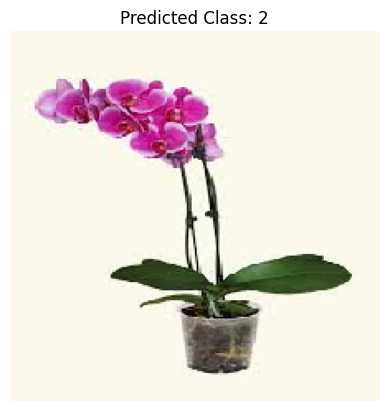

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
model = tf.keras.models.load_model("flower_classifier_model.keras")

# ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿµŸàÿ±ÿ© ÿßŸÑÿ¨ÿØŸäÿØÿ©
img_path = "test_images/orchid.jpg"  # ÿßÿ≥ÿ™ÿ®ÿØŸÑ Ÿáÿ∞ÿß ÿ®ÿßŸÑŸÖÿ≥ÿßÿ± ÿßŸÑŸÅÿπŸÑŸä ŸÑŸÑÿµŸàÿ±ÿ©
img = image.load_img(img_path, target_size=(224, 224))  # ÿ™ÿ∫ŸäŸäÿ± ÿßŸÑÿ≠ÿ¨ŸÖ ŸÑŸäÿ™ŸÜÿßÿ≥ÿ® ŸÖÿπ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
img_array = image.img_to_array(img) / 255.0  # ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑÿµŸàÿ±ÿ© ÿ•ŸÑŸâ ŸÖÿµŸÅŸàŸÅÿ© Ÿàÿ™ÿ∑ÿ®ŸäÿπŸáÿß
img_array = np.expand_dims(img_array, axis=0)  # ÿ•ÿ∂ÿßŸÅÿ© ÿ®ÿπÿØ ŸÑÿ™ÿ™ŸÜÿßÿ≥ÿ® ŸÖÿπ ŸÖÿØÿÆŸÑÿßÿ™ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨

# ÿ™ŸÜŸÅŸäÿ∞ ÿßŸÑÿ™ŸÜÿ®ÿ§
predictions = model.predict(img_array)

# ÿßŸÑÿ≠ÿµŸàŸÑ ÿπŸÑŸâ ÿßŸÑŸÅÿ¶ÿ© ÿßŸÑŸÖÿ™ŸàŸÇÿπÿ©
predicted_class = np.argmax(predictions)  # ÿ•ÿ±ÿ¨ÿßÿπ ÿßŸÑŸÅÿ¶ÿ© ÿ∞ÿßÿ™ ÿßŸÑÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ© ÿßŸÑÿ£ÿπŸÑŸâ

# ÿ∑ÿ®ÿßÿπÿ© ÿßŸÑŸÜÿ™Ÿäÿ¨ÿ©
print(f"ÿßŸÑŸÅÿ¶ÿ© ÿßŸÑŸÖÿ™ŸàŸÇÿπÿ©: {predicted_class}")

# ÿπÿ±ÿ∂ ÿßŸÑÿµŸàÿ±ÿ© ŸÖÿπ ÿßŸÑÿ™ŸÜÿ®ÿ§
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis("off")
plt.show()
